In [2]:
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from IPython.display import Image
# read dataset
poke = pd.read_csv('data/pokemon_alopez247.csv')

## Dataset Features
* **Number.** Pokémon ID in the Pokédex.
* **Name.** Name of the Pokémon.
* **Type_1.** Primary type.
* **Type_2.** Second type, in case the Pokémon has it.
* **Total.** Sum of all the base stats (Health Points, Attack, Defense, Special Attack, Special Defense, and Speed).
* **HP.** Base Health Points.
* **Attack.** Base Attack.
* **Defense.** Base Defense.
* **Sp_Atk.** Base Special Attack.
* **Sp_Def.** Base Special Defense.
* **Speed.** Base Speed.
* **Generation.** Number of the generation when the Pokémon was introduced.
* **isLegendary.** Boolean that indicates whether the Pokémon is Legendary or not.
* **Color.** Color of the Pokémon according to the Pokédex.
* **hasGender.** Boolean that indicates if the Pokémon can be classified as female or male.
* **Pr_male.** In case the Pokémon has Gender, the probability of its being male. The probability of being female is, of course, 1 minus this value.
* **Egg_Group_1.** Egg Group of the Pokémon.
* **Egg_Group_2.** Second Egg Group of the Pokémon, in case it has two.
* **hasMegaEvolution.** Boolean that indicates whether the Pokémon is able to Mega-evolve or not.
* **Height_m.** Height of the Pokémon, in meters.
* **Weight_kg.** Weight of the Pokémon, in kilograms.
* **Catch_Rate.** Catch Rate.
* **Body_Style.** Body Style of the Pokémon according to the Pokédex.

## Storytelling

This dataset consist a 721 pokemons of the 1 to 6 Generations, including several features like stats, types, catch rate, if the pokemon is legendary and others, totaling 21 variables. With him we will try to answer the fallowing questions:

1. [How the amount of pokemons is distributed per generation?](#1.-How-the-amount-of-pokemons-is-distributed-per-generation?)
2. [Is there missing data in this dataset?](#2.-Is-there-missing-data-in-this-dataset?)
3. [Is there any relationship between the type of pokemon and it's color?](#3.-Is-there-any-relationship-between-the-type-of-pokemon-and-it's-color?)
4. [Which pokemons have the highest attributes values? and lowest?](#4.-Which-pokemons-have-the-highest-attributes-values?-and-lowest?)
5. [Are there correlations between other attributes?](#5.-Are-there-correlations-between-other-attributes?)
6. [Can we find clusters among pokemons?](#6.-Can-we-find-clusters-among-pokemons?)
7. [Can we create a classifying model for legendary pokemons?](#7.-Can-we-create-a-classifying-model-for-legendary-pokemons?)

### 1. How the amount of pokemons is distributed per generation?
[^ UP ^](#Storytelling)

In [64]:
'Total pokemons: {}'.format(len(poke))

'Total pokemons: 721'

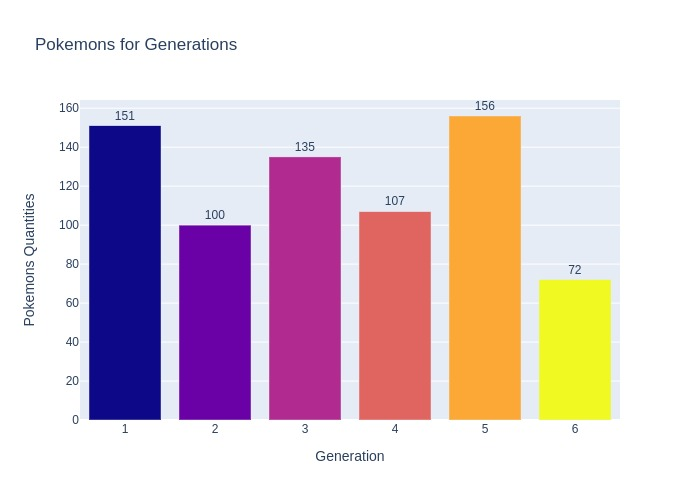

In [88]:
trace = go.Bar(x=list(poke.groupby('Generation').groups.keys()),
               y=[len(i) for i in poke.groupby('Generation').groups.values()],
               text=[len(i) for i in poke.groupby('Generation').groups.values()],
               textposition='outside',
               marker={'color':list(poke.groupby('Generation').groups.keys())}
              )
layout = go.Layout({'title':'Pokemons for Generations', 
                   'xaxis':{'title':'Generation'}, 
                   'yaxis':{'title':'Pokemons Quantities'}})

fig = go.Figure(data=[trace],layout=layout)
#fig.show()
display(Image(fig.to_image(format= 'jpg')))

### 2. Is there missing data in this dataset?
[^ UP ^](#Storytelling)

* 371 has no second type
* 77 has no Pr_Male and for this, hasGender equals False
* 530 has no Egg_Group_2
    
**Type_1** and **Egg_Group_2** has a lot of NaN data because many pokemons are only one type and one egg group.

10 percent are **Pr_Male** NaN because 77 pokemons has no gender and if these, 40 are Legendary of 46 Legendaries.

In [89]:
# verify the missing data and quantify
missing = pd.DataFrame({'qtd_NaN_data':poke.isna().sum(), 
                        'perc_NaN_data':round((poke.isna().sum()*100/poke.shape[0]), 2)})
missing

,qtd_NaN_data,perc_NaN_data
Number,0,0.00
Name,0,0.00
Type_1,0,0.00
Type_2,371,51.46
Total,0,0.00
HP,0,0.00
Attack,0,0.00
Defense,0,0.00
Sp_Atk,0,0.00
Sp_Def,0,0.00


* The most Legendary pokemons hasGender equals False

In [60]:
# list of legendery with gender
print('**   Legendary pokemons with gender only {} of {}  **'.format(len(poke[(poke['hasGender'] == True) & (poke['isLegendary'] == True)]), 
                                                             len(poke[poke['isLegendary'] == True])))
poke[(poke['hasGender'] == True) & (poke['isLegendary'] == True)]

**   Legendary pokemons with gender only 6 of 46  **


,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
379,380,Latias,Dragon,Psychic,600,80,80,90,110,130,...,Red,True,0.0,Undiscovered,NaN,True,1.40,40.0,3,two_wings
380,381,Latios,Dragon,Psychic,600,80,90,80,130,110,...,Blue,True,1.0,Undiscovered,NaN,True,2.01,60.0,3,two_wings
484,485,Heatran,Fire,Steel,600,91,90,106,130,106,...,Brown,True,0.5,Undiscovered,NaN,False,1.70,430.0,3,quadruped
640,641,Tornadus,Flying,NaN,580,79,115,70,125,80,...,Green,True,1.0,Undiscovered,NaN,False,1.50,63.0,3,head_arms
641,642,Thundurus,Electric,Flying,580,79,115,70,125,80,...,Blue,True,1.0,Undiscovered,NaN,False,1.50,61.0,3,head_arms
644,645,Landorus,Ground,Flying,600,89,125,90,115,80,...,Brown,True,1.0,Undiscovered,NaN,False,1.50,68.0,3,head_arms


### 3. Is there any relationship between the type of pokemon and it's color?
[^ UP ^](#Storytelling)

* The most common Type_1 pokemon is Water fallowing by Normal
* The most common Type_2 pokemon is Flying
* Blue and Brown Colors appear more often
* Some types of pokemons have standard colors
    * Most **Water** pokemons are Blue
    * Most **Steel** pokemons are Grey
    * **Poison** pokemons are Purple and Green
    * **Normal** pokemons are Brown
    * **Ice** are blue and white
    * **Grass** are green
    * **Fire** are red, brown and yellow
    * **Fair** are pink and white
    * **Electric** are yellow

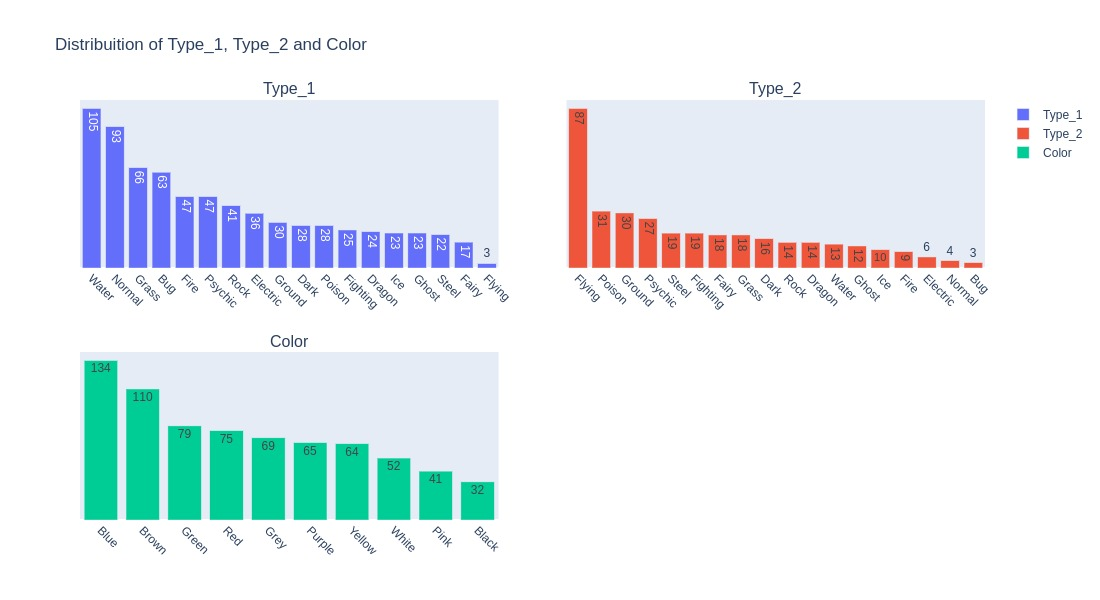

In [95]:
# list of categorical features
cat_feat = ['Type_1', 'Type_2', 'Color']

# instantiate a subplot fig
fig = make_subplots(rows=2,cols=2,
                    vertical_spacing=0.2,
                    horizontal_spacing=0.075,
                    subplot_titles=cat_feat)

# add each trace generated by each feature
for enu, c in enumerate(cat_feat):
    # total values
    status_values = poke[c].value_counts().to_frame()
    # plot distribuition
    trace = go.Bar(x=status_values.index, 
                   y=status_values[c], 
                   text=status_values[c], 
                   textposition='auto',
                   name=c
                  )
    
    # calculate position
    row=int(np.ceil((enu+1)/2))
    col=(enu % 2)+1
    
    # add trace
    fig.append_trace(trace, row=row, col=col)
    fig.update_xaxes(tickangle = 45)
    fig.update_yaxes(showgrid = False,showticklabels = False)

# update layout
fig.update_layout(title_text='Distribuition of Type_1, Type_2 and Color', 
                  height=600, width=1100)

# to be viewed on github
img = fig.to_image(format='jpg')
Image(img)
# to normal plot
#fig.show()

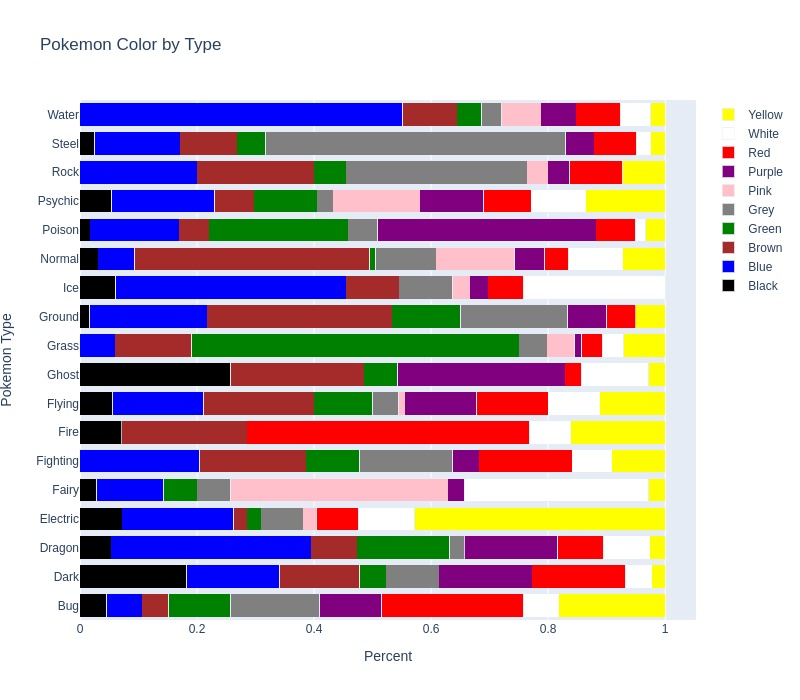

In [97]:
# group by two fields
f1 = 'Type_1'
f2 = 'Color'
test = poke.groupby([f1,f2]).Color.count().to_frame()
test = test.rename(columns={'Color':'ct'})

# reset indexs
test.reset_index(inplace=True)

# row to col
test = test.pivot(index=f2, columns=f1)['ct']
test = test.fillna(0)

# group by two fields
f1 = 'Type_2'
f2 = 'Color'
test2 = poke.groupby([f1,f2]).Color.count().to_frame()
test2 = test2.rename(columns={'Color':'ct'})
# reset indexs
test2.reset_index(inplace=True)
# row to col
test2 = test2.pivot(index=f2, columns=f1)['ct']
test2 = test2.fillna(0)

# sum total of type_1 by color and type_2 by color
test = test+test2

# percent value of each color
for c in test.columns:
    test[c] = test[c]/test[c].sum()

# print color bar by pokemon type
data = []

for field in test.index:
    y = test.columns
    x = test[test.index == field].values[0]
    # create bard
    bar = go.Bar(x=x, y=y, name=field,
                  orientation='h', marker = dict(color=field))

    data.append(bar)

layout = go.Layout(title = 'Pokemon Color by Type', 
                   barmode='stack', 
                   yaxis=dict(title='Pokemon Type'), xaxis=dict(title='Percent'))
fig = go.Figure(data=data,layout=layout)

fig.update_layout(height=700, width=800)
Image(fig.to_image('jpg'))

### 4. Which pokemons have the highest attributes values? and lowest?
[^ UP ^](#Storytelling)

* List of Max Attributes Pokemons
    * Total: Arceus
    * HP: Blissey
    * Attack: Rampardos
    * Defense: Shuckle
    * Speed Attack: Mewtwo
    * Speed Defense: Shuckle
    * Speed: Ninjask

In [43]:
print('Max Total')
display(poke[(poke['Total'] == poke['Total'].max())][['Number', 'Name','Type_1', 'Total', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed']])
print('Max HP')
display(poke[poke['HP'] == poke['HP'].max()][['Number', 'Name','Type_1', 'Total', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed']])
print('Max Attack')
display(poke[(poke['Attack'] == poke['Attack'].max())][['Number', 'Name','Type_1', 'Total', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed']])
print('Max Defense')
display(poke[(poke['Defense'] == poke['Defense'].max())][['Number', 'Name','Type_1', 'Total', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed']])
print('Max Speed Attack')
display(poke[(poke['Sp_Atk'] == poke['Sp_Atk'].max())][['Number', 'Name','Type_1', 'Total', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed']])
print('Max Speed Defense')
display(poke[(poke['Sp_Def'] == poke['Sp_Def'].max())][['Number', 'Name','Type_1', 'Total', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed']])
print('Max Speed')
display(poke[(poke['Speed'] == poke['Speed'].max())][['Number', 'Name','Type_1', 'Total', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed']])

Max Total


,Number,Name,Type_1,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed
492,493,Arceus,Normal,720,120,120,120,120,120,120


Max HP


,Number,Name,Type_1,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed
241,242,Blissey,Normal,540,255,10,10,75,135,55


Max Attack


,Number,Name,Type_1,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed
408,409,Rampardos,Rock,495,97,165,60,65,50,58


Max Defense


,Number,Name,Type_1,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed
212,213,Shuckle,Bug,505,20,10,230,10,230,5


Max Speed Attack


,Number,Name,Type_1,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed
149,150,Mewtwo,Psychic,680,106,110,90,154,90,130


Max Speed Defense


,Number,Name,Type_1,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed
212,213,Shuckle,Bug,505,20,10,230,10,230,5


Max Speed


,Number,Name,Type_1,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed
290,291,Ninjask,Bug,456,61,90,45,50,50,160


![alt text](imgs/pokemax.png)

* List of Min Attributes Pokemons
    * Total: Sunkern
    * HP: Shedinja
    * Attack: Chansey, Happiny
    * Defense: Chansey, Happiny
    * Speed Attack: Shuckle, Feebas, Bonsly
    * Speed Defense: Caterpie, Weedle, Magikarp, Igglybuff, Carvanha
    * Speed: Shuckle, Munchlax

In [51]:
print('Min Total')
display(poke[(poke['Total'] == poke['Total'].min())][['Number', 'Name','Type_1', 'Total', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed']])
print('Min HP')
display(poke[poke['HP'] == poke['HP'].min()][['Number', 'Name','Type_1', 'Total', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed']])
print('Min Attack')
display(poke[(poke['Attack'] == poke['Attack'].min())][['Number', 'Name','Type_1', 'Total', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed']])
print('Min Defense')
display(poke[(poke['Defense'] == poke['Defense'].min())][['Number', 'Name','Type_1', 'Total', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed']])
print('Min Speed Attack')
display(poke[(poke['Sp_Atk'] == poke['Sp_Atk'].min())][['Number', 'Name','Type_1', 'Total', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed']])
print('Min Speed Defense')
display(poke[(poke['Sp_Def'] == poke['Sp_Def'].min())][['Number', 'Name','Type_1', 'Total', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed']])
print('Min Speed')
display(poke[(poke['Speed'] == poke['Speed'].min())][['Number', 'Name','Type_1', 'Total', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed']])

Min Total


,Number,Name,Type_1,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed
190,191,Sunkern,Grass,180,30,30,30,30,30,30


Min HP


,Number,Name,Type_1,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed
291,292,Shedinja,Bug,236,1,90,45,30,30,40


Min Attack


,Number,Name,Type_1,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed
112,113,Chansey,Normal,450,250,5,5,35,105,50
439,440,Happiny,Normal,220,100,5,5,15,65,30


Min Defense


,Number,Name,Type_1,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed
112,113,Chansey,Normal,450,250,5,5,35,105,50
439,440,Happiny,Normal,220,100,5,5,15,65,30


Min Speed Attack


,Number,Name,Type_1,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed
212,213,Shuckle,Bug,505,20,10,230,10,230,5
348,349,Feebas,Water,200,20,15,20,10,55,80
437,438,Bonsly,Rock,290,50,80,95,10,45,10


Min Speed Defense


,Number,Name,Type_1,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed
9,10,Caterpie,Bug,195,45,30,35,20,20,45
12,13,Weedle,Bug,195,40,35,30,20,20,50
128,129,Magikarp,Water,200,20,10,55,15,20,80
173,174,Igglybuff,Normal,210,90,30,15,40,20,15
317,318,Carvanha,Water,305,45,90,20,65,20,65


Min Speed


,Number,Name,Type_1,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed
212,213,Shuckle,Bug,505,20,10,230,10,230,5
445,446,Munchlax,Normal,390,135,85,40,40,85,5


### 5. Are there correlations between other attributes?
[^ UP ^](#Storytelling)

* We can see the obviosly correlation betwenn Total and HP, Attack, Defense, Sp_Atk, Sp_Def and Speed because Total is the sumatory of this features
* The higher the attributes values, if isLegendary, when more male rate, if hasMegaEvolution, the higher height and weight, and the type is  Dragon, the lower the Catch_Rate
* The height and weight increase with attributes and each self
* Pokemons with pink colors and type fairy have lower Pr_Male
* Pokemons with Steel and Rock Type tends to have a highter value in Defense

In [101]:
# convert some categorical feature to new columns
poke_dm = pd.get_dummies(poke, columns=['Type_1', 'Type_2', 'Color'])
display(poke_dm.head())

# group Type_1 and Type_2
for t in poke.groupby(['Type_1']).groups.keys():
    poke_dm['Type_{}'.format(t)] = poke_dm.loc[:,
                                        poke_dm.columns.str.endswith(t)].sum(axis=1)
    del poke_dm['Type_1_{}'.format(t)]
    del poke_dm['Type_2_{}'.format(t)]
    
display(poke_dm.info())
# calculate correlation with pearson method
correlations = poke_dm.corr(method='pearson')

,Number,Name,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,...,Color_Black,Color_Blue,Color_Brown,Color_Green,Color_Grey,Color_Pink,Color_Purple,Color_Red,Color_White,Color_Yellow
0,1,Bulbasaur,318,45,49,49,65,65,45,1,...,0,0,0,1,0,0,0,0,0,0
1,2,Ivysaur,405,60,62,63,80,80,60,1,...,0,0,0,1,0,0,0,0,0,0
2,3,Venusaur,525,80,82,83,100,100,80,1,...,0,0,0,1,0,0,0,0,0,0
3,4,Charmander,309,39,52,43,60,50,65,1,...,0,0,0,0,0,0,0,1,0,0
4,5,Charmeleon,405,58,64,58,80,65,80,1,...,0,0,0,0,0,0,0,1,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 48 columns):
Number              721 non-null int64
Name                721 non-null object
Total               721 non-null int64
HP                  721 non-null int64
Attack              721 non-null int64
Defense             721 non-null int64
Sp_Atk              721 non-null int64
Sp_Def              721 non-null int64
Speed               721 non-null int64
Generation          721 non-null int64
isLegendary         721 non-null bool
hasGender           721 non-null bool
Pr_Male             644 non-null float64
Egg_Group_1         721 non-null object
Egg_Group_2         191 non-null object
hasMegaEvolution    721 non-null bool
Height_m            721 non-null float64
Weight_kg           721 non-null float64
Catch_Rate          721 non-null int64
Body_Style          721 non-null object
Color_Black         721 non-null uint8
Color_Blue          721 non-null uint8
Color_Brown         721 non-nu

None

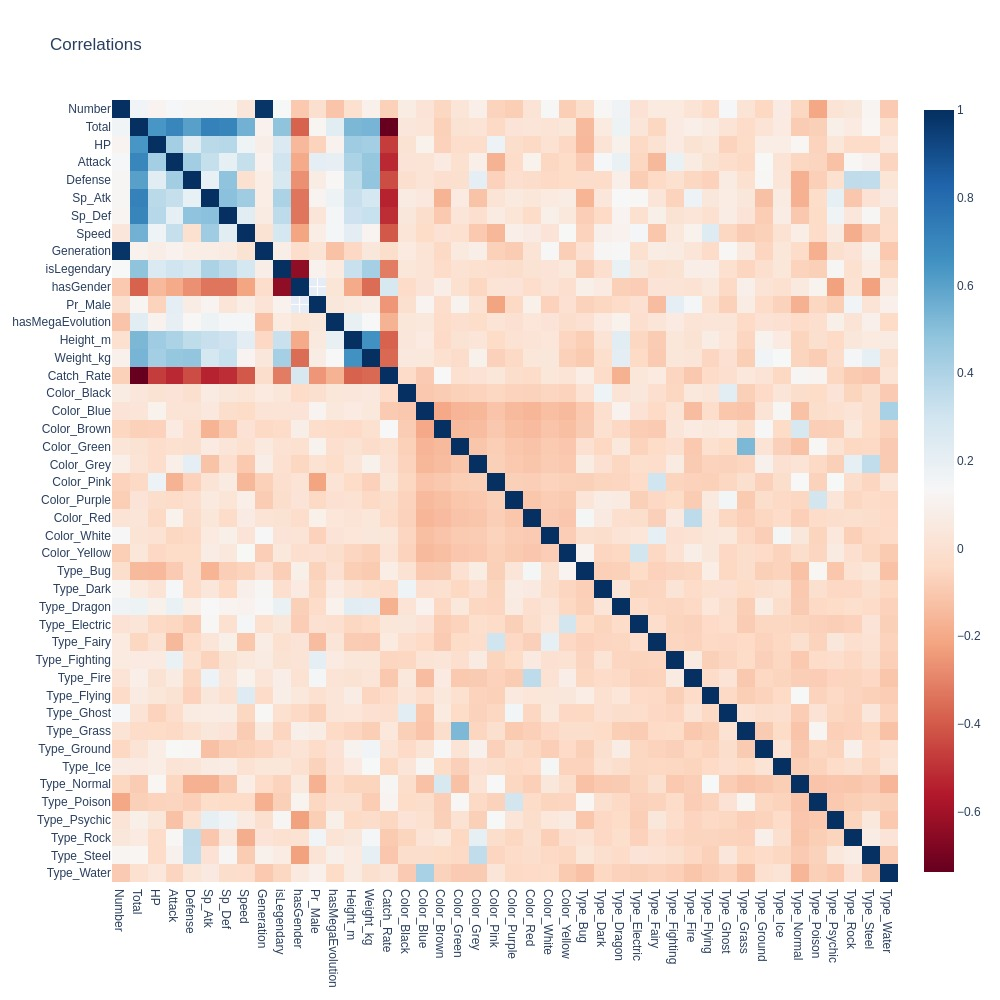

In [102]:
# Print the heatmap of this correlation
data = [go.Heatmap(x=correlations.columns,
                   y=correlations.index,
                   z=correlations, colorscale='RdBu')]
layout = go.Layout(title='Correlations',
                   yaxis={'autorange':"reversed"})

fig = go.Figure(data=data,layout=layout)
fig.update_layout(autosize=False, height=1000, width=1000)

# to be viewed on github
img_bytes = fig.to_image(format="jpeg")
Image(img_bytes)

# to normal plot
#fig.show()

### 6. Can we find clusters among pokemons?
[^ UP ^](#Storytelling)

Applying a dendogram with Euclidean distance in numerical features, we can see a 4 possible clusters as bellow. The purple group has the most strongest pokemons with legendary and latest evolution of special pokemons.

We can see how this clusters are related with some features. The clear division between clusters in relation **Total x Catch_Rate** can indicate this fields are most important to determine the groups

Index(['Number', 'Total', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def',
       'Speed', 'Generation', 'isLegendary', 'hasGender', 'Pr_Male',
       'hasMegaEvolution', 'Height_m', 'Weight_kg', 'Catch_Rate', 'Type_Bug',
       'Type_Dark', 'Type_Dragon', 'Type_Electric', 'Type_Fairy',
       'Type_Fighting', 'Type_Fire', 'Type_Flying', 'Type_Ghost', 'Type_Grass',
       'Type_Ground', 'Type_Ice', 'Type_Normal', 'Type_Poison', 'Type_Psychic',
       'Type_Rock', 'Type_Steel', 'Type_Water', 'Cluster'],
      dtype='object')


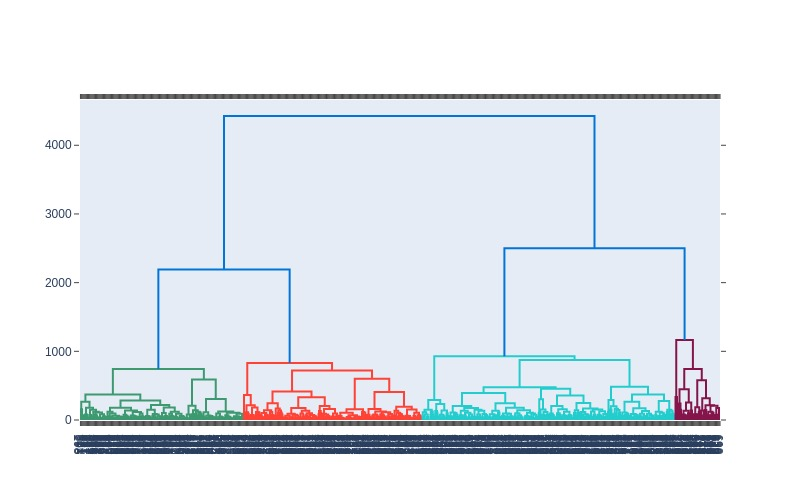

In [108]:
# let's print a dendogram of our data
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64', 'bool']
print(poke_dm.select_dtypes(include=numerics).columns)

# list of features
num_feat = ['Total', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def',
       'Speed', 'Height_m', 'Weight_kg', 'Catch_Rate', 'hasGender', 'hasMegaEvolution',
       'Type_Bug', 'Type_Dark', 'Type_Dragon', 'Type_Electric', 'Type_Fairy',
       'Type_Fighting', 'Type_Fire', 'Type_Flying', 'Type_Ghost', 'Type_Grass',
       'Type_Ground', 'Type_Ice', 'Type_Normal', 'Type_Poison', 'Type_Psychic',
       'Type_Rock', 'Type_Steel', 'Type_Water']

# calculate the clusters with euclidean distance
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')

# create dendogram with custom linkagefun
fig = ff.create_dendrogram(
    poke_dm[num_feat], orientation='bottom',
    linkagefun=lambda x: shc.linkage(poke_dm[num_feat], 'ward', metric='euclidean'), 
    color_threshold=2000
)
fig.update_layout(width=800, height=500)
# fig.show()
Image(fig.to_image('jpg'))

In [109]:
cl = cluster.fit_predict(poke_dm[num_feat])
# add cluster in dataframe
poke_dm['Cluster'] = cl

# totalizate each group
zero, um, dois, tres = [], [], [], []
for ii, i in enumerate(cl):
    if i==0:
        zero.append(poke[poke.index == ii].Name.values[0])
    if i==1:
        um.append(poke[poke.index == ii].Name.values[0])
    if i==2:
        dois.append(poke[poke.index == ii].Name.values[0])
    if i==3:
        tres.append(poke[poke.index == ii].Name.values[0])
       
print('0:{}, 1:{}, 2:{}, 3:{}'.format(len(zero), len(um), len(dois), len(tres)))
# print the smallest group 
print(zero)

0:51, 1:201, 2:285, 3:184
['Golem', 'Gyarados', 'Lapras', 'Snorlax', 'Dragonite', 'Steelix', 'Raikou', 'Entei', 'Suicune', 'Tyranitar', 'Lugia', 'Ho-Oh', 'Aggron', 'Wailord', 'Glalie', 'Metagross', 'Regirock', 'Regice', 'Registeel', 'Kyogre', 'Groudon', 'Rayquaza', 'Torterra', 'Hippowdon', 'Rhyperior', 'Mamoswine', 'Probopass', 'Dialga', 'Palkia', 'Heatran', 'Regigigas', 'Giratina', 'Arceus', 'Gigalith', 'Beartic', 'Golurk', 'Hydreigon', 'Cobalion', 'Terrakion', 'Virizion', 'Reshiram', 'Zekrom', 'Kyurem', 'Tyrantrum', 'Aurorus', 'Goodra', 'Avalugg', 'Xerneas', 'Yveltal', 'Zygarde', 'Volcanion']


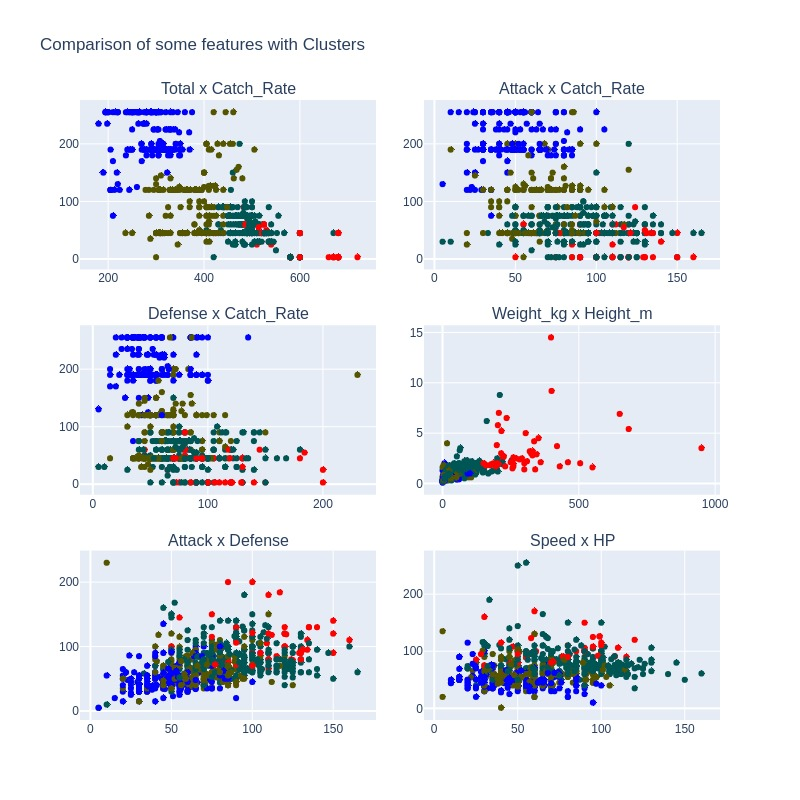

In [107]:
# Check the behavior of groups with respect to field combinations
comb = [['Total','Catch_Rate'],
        ['Attack','Catch_Rate'],
        ['Defense','Catch_Rate'],
        ['Weight_kg','Height_m'],
        ['Attack','Defense'],
        ['Speed','HP']]

# create a figure
fig = make_subplots(rows=3,cols=2,
                    vertical_spacing=0.09,
                    horizontal_spacing=0.075,
                    subplot_titles= ['{} x {}'.format(i[0], i[1]) for i in comb]
                   )

# each combination with a subplot
for enu, fields in enumerate(comb):         
    value_x = poke_dm[fields[0]]
    value_y = poke_dm[fields[1]]
    
    row=int(np.ceil((enu+1)/2))
    col=(enu % 2)+1
    
    trace = go.Scatter(x=value_x,
                       y=value_y, 
                       mode='markers',
                       marker=dict(color=poke_dm['Cluster'], colorscale=["red", "green", "blue"])                       
                       )
    fig.append_trace(trace, row=row, col=col)
    
fig.update_layout(title='Comparison of some features with Clusters', showlegend=False, width=800, height=800)
#fig.show()
Image(fig.to_image('jpg'))

### Reducing Dimensionality with PCA

To visualize the data in 2D we can reduce the dimensionality, here used PCA with 2 components. After that, plotting the new dimension and applying de previous clusters we see a separation of the data. The blue color with weakest pokemons and red with the strongest.

In [111]:
from sklearn.decomposition import PCA as skPCA

# create two components PCA
s_pca = skPCA(n_components=2)
pca_components = s_pca.fit_transform(poke_dm[num_feat])
c_pca1 = pca_components[:,0]
c_pca2 = pca_components[:,1]
# add the componets to dataframe
poke_dm['pca1'] = c_pca1
poke_dm['pca2'] = c_pca2
poke_dm.head(2)

,Number,Name,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,...,Type_Ice,Type_Normal,Type_Poison,Type_Psychic,Type_Rock,Type_Steel,Type_Water,Cluster,pca1,pca2
0,1,Bulbasaur,318,45,49,49,65,65,45,1,...,0,0,1,0,0,0,0,1,-83.239583,-33.685221
1,2,Ivysaur,405,60,62,63,80,80,60,1,...,0,0,1,0,0,0,0,1,-6.273594,-55.893761


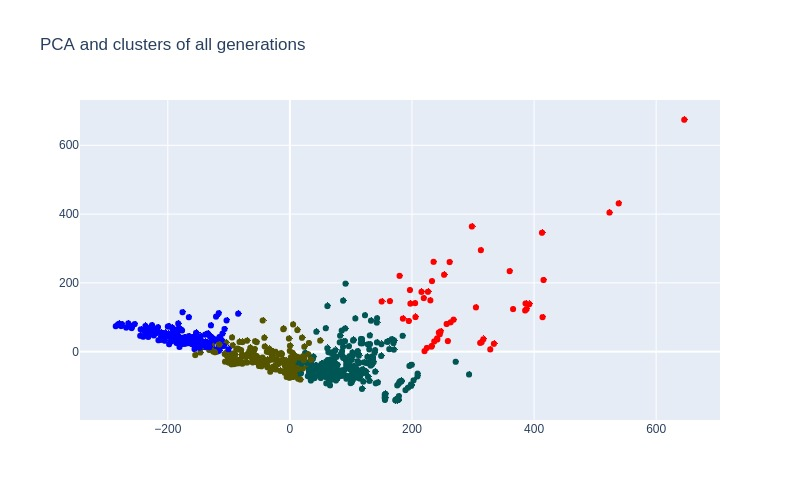

In [112]:
# Plot PCA with the previously groups
poke_dm_temp = poke_dm
trace = go.Scatter(x=poke_dm_temp['pca1'],
                   y=poke_dm_temp['pca2'],
                   mode='markers',
                   text=poke_dm_temp['Name'],
                   marker=dict(color=poke_dm_temp['Cluster'], colorscale=["red", "green", "blue"]))

fig = go.Figure(data=[trace])
fig.update_layout(title='PCA and clusters of all generations',width=800, height=500)
#fig.show()
Image(fig.to_image('jpg'))

Plotting the PCA components with coloring the isLegendary we see a division in the data, so we can try use the data to predict if with the pokemon data is or not a Legendary pokemon.

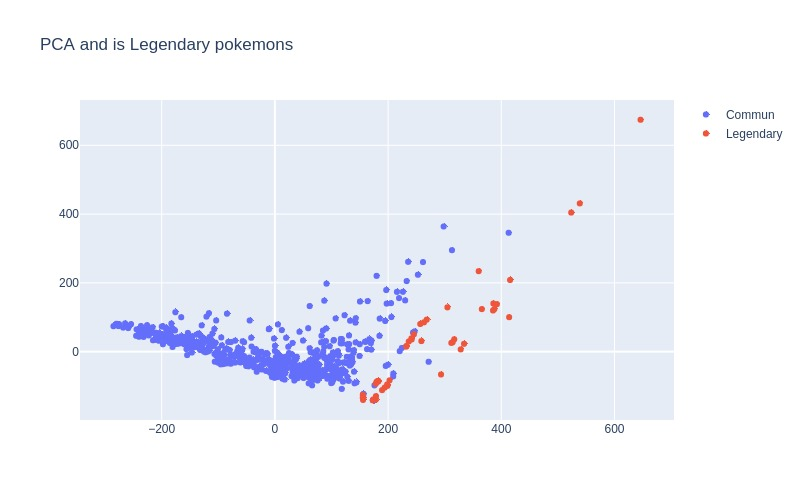

In [113]:
# Plot PCA with print legendary and no legendary pokemons
poke_dm_temp = poke_dm
# no legendary
trace1 = go.Scatter(x=poke_dm_temp[poke_dm_temp['isLegendary'] == False]['pca1'],
                   y=poke_dm_temp[poke_dm_temp['isLegendary'] == False]['pca2'],
                   mode='markers',
                   text=poke_dm_temp[poke_dm_temp['isLegendary'] == False]['Name'],
                   name='Commun'
                  )
# legendary
trace2 = go.Scatter(x=poke_dm_temp[poke_dm_temp['isLegendary'] == True]['pca1'],
                   y=poke_dm_temp[poke_dm_temp['isLegendary'] == True]['pca2'],
                   mode='markers',
                   text=poke_dm_temp[poke_dm_temp['isLegendary'] == True]['Name'],
                   name='Legendary'
                  )

fig = go.Figure(data=[trace1, trace2])
fig.update_layout(title='PCA and is Legendary pokemons',width=800, height=500, showlegend=True)
#fig.show()
Image(fig.to_image('jpg'))

### 7. Can we create a classifying model for legendary pokemons?
[^ UP ^](#Storytelling)

Let's create models to predict if the pokemon is or not a Legendary we will use a crossvalidation tecnique to validate de models and finally verify the accurafy of each model.

To crossvalidation we use a fold with size 10, that is, the data will be dividade in 10 parts, one is separated to test the model, not used to the train model. This processes repeat alternating between the folds.

In [114]:
from sklearn.model_selection import cross_val_score # Cross validation function
from sklearn.metrics import confusion_matrix # To generate n confusion matrix
from sklearn.naive_bayes import GaussianNB # Naive Bayes with Gaussian
from sklearn.neighbors import KNeighborsClassifier # KNN model
from sklearn.svm import SVC # SVM categorical
from sklearn.gaussian_process import GaussianProcessClassifier # Gaussian process classification based on Laplace approximation
from sklearn.gaussian_process.kernels import RBF # Parameter of GPC
from sklearn.tree import DecisionTreeClassifier # Decision Tree to Classifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier # Random Forest and Adaboost

# features used in models
x_features = ['HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def',
            'Speed', 'Height_m', 'Weight_kg', 'Catch_Rate',
            'Type_Bug', 'Type_Dark', 'Type_Dragon', 'Type_Electric', 'Type_Fairy',
            'Type_Fighting', 'Type_Fire', 'Type_Flying', 'Type_Ghost', 'Type_Grass',
            'Type_Ground', 'Type_Ice', 'Type_Normal', 'Type_Poison', 'Type_Psychic',
            'Type_Rock', 'Type_Steel', 'Type_Water']
# feature target
y_features = ['isLegendary']

# separete dataset and targer
data_set = poke_dm[x_features]
target = poke_dm[y_features].values.ravel()

# list of models
models = [GaussianNB(),
          KNeighborsClassifier(3), 
          SVC(kernel="linear", C=0.025),
          SVC(gamma=10, C=2),
          GaussianProcessClassifier(1.0 * RBF(1.0)),
          AdaBoostClassifier(),
          DecisionTreeClassifier(max_depth=5),          
          RandomForestClassifier(max_depth=10, n_estimators=5, max_features=1),
         ]

# name models
models_name = ["Naive Bayes", "Nearest Neighbors", "Linear SVM", "RBF SVM", 
               "Gaussian Process","AdaBoost", "Decision Tree", "Random Forest"]

In [115]:
total_scores = {}
for model, model_name in zip(models, models_name):
    np.random.seed = 42
    # K-fold k=5
    scores = cross_val_score(model, data_set, target, cv=10, scoring='accuracy')
    total_scores[model_name] = [scores, scores.mean(), scores.std()]
    # Accuracy
    print("{} -- K-Fold mean accuracy: {:0.3f} (std: {:0.3f})".format(model_name, scores.mean(), scores.std()))
    # Verify prediction of all data
    y_pred = model.fit(data_set,target).predict(data_set)
    
    # Confusion Matrix
    z = confusion_matrix(target, y_pred)
    x=['No Legendary', 'Is Legendary']
    y=['No Legendary', 'Is Legendary']

Naive Bayes -- K-Fold mean accuracy: 0.839 (std: 0.091)
Nearest Neighbors -- K-Fold mean accuracy: 0.974 (std: 0.016)
Linear SVM -- K-Fold mean accuracy: 0.985 (std: 0.017)
RBF SVM -- K-Fold mean accuracy: 0.936 (std: 0.006)
Gaussian Process -- K-Fold mean accuracy: 0.983 (std: 0.014)
AdaBoost -- K-Fold mean accuracy: 0.975 (std: 0.026)
Decision Tree -- K-Fold mean accuracy: 0.969 (std: 0.027)
Random Forest -- K-Fold mean accuracy: 0.967 (std: 0.019)


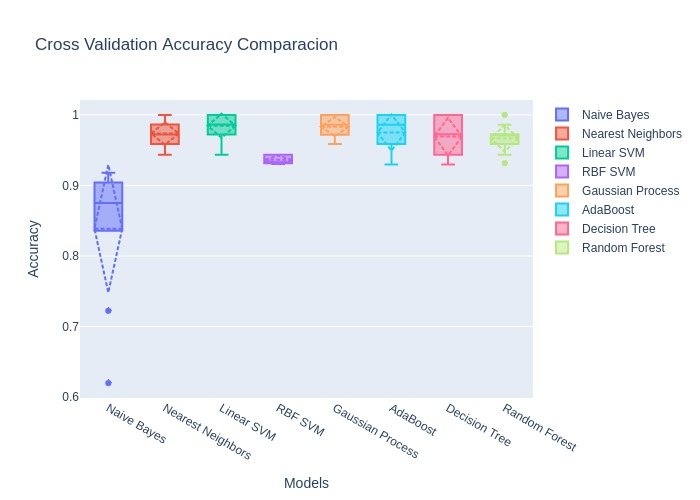

In [116]:
# boxplot of 10 folds of each model
# Gaussian Process has better result and RBF SVM has a more stable model
fig = go.Figure()
for enu, (model, (scores, v_mean, v_std)) in enumerate(total_scores.items()):
    fig.add_trace(go.Box(
        y=scores, 
        name=model,  
        boxmean='sd'))
fig.update_layout(title = 'Cross Validation Accuracy Comparacion')
fig.update_yaxes(title = 'Accuracy')
fig.update_xaxes(title = 'Models')
#fig.show()
display(Image(fig.to_image('jpg')))

We can see the better models are **Gaussian Process** and **Linear SVM** with the better mean and lowest std, obtaining an avarage accuracy of 0.985 and 0.983 respectively. In contrast, the most stable model is **RBF SVM**.

Now, analysing the **Gaussian Process** and **Linear SVM** models we can generate the confusion matrix to avaliate the wrong predictions. There are 4 and 7 false positive pokemons wrong classiffied and 1 and 1 false positive pokemon as can see em table bellow.

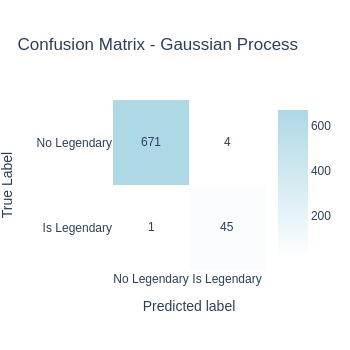

,Number,Name,Total,isLegendary
489,490,Manaphy,600,False
491,492,Shaymin,600,True
646,647,Keldeo,580,False
647,648,Meloetta,600,False
648,649,Genesect,600,False


In [117]:
np.random.seed = 42

gpc = GaussianProcessClassifier(1.0 * RBF(1.0))
y_pred = gpc.fit(data_set,target).predict(data_set)

# Confusion Matrix
z = confusion_matrix(target, y_pred)
x=['No Legendary', 'Is Legendary']
y=['No Legendary', 'Is Legendary']

# Generate annotations to graph
annotations = []
for n, row in enumerate(z):
    for m, val in enumerate(row):
        annotations.append(go.layout.Annotation(text=str(z[n][m]), x=x[m], y=y[n],
                                         xref='x1', yref='y1', showarrow=False))

data = [go.Heatmap(x=x,y=y,z=z,                   
               colorscale=["white", "lightblue"])] #amp blues peach

layout = go.Layout(title='Confusion Matrix - {}'.format('Gaussian Process'), 
                   xaxis={'title' : 'Predicted label'},
                   yaxis={'autorange' : 'reversed', 
                          'title' : 'True Label'})

fig = go.Figure(data=data, layout=layout)
fig['layout'].update(annotations=annotations, height=350, width=350)

# fig.show()
display(Image(fig.to_image('jpg')))

# wrong classification
poke_dm[poke_dm['isLegendary'] != y_pred][['Number', 'Name', 'Total', 'isLegendary']]

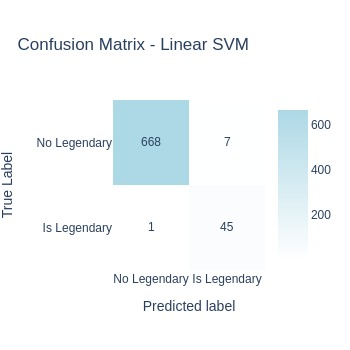

,Number,Name,Total,isLegendary
288,289,Slaking,670,False
375,376,Metagross,600,False
487,488,Cresselia,600,False
489,490,Manaphy,600,False
491,492,Shaymin,600,True
646,647,Keldeo,580,False
647,648,Meloetta,600,False
648,649,Genesect,600,False


In [118]:
np.random.seed = 42

lsvc = SVC(kernel="linear", C=0.025)
y_pred = lsvc.fit(data_set,target).predict(data_set)

# Confusion Matrix
z = confusion_matrix(target, y_pred)
x=['No Legendary', 'Is Legendary']
y=['No Legendary', 'Is Legendary']

# Generate annotations to graph
annotations = []
for n, row in enumerate(z):
    for m, val in enumerate(row):
        annotations.append(go.layout.Annotation(text=str(z[n][m]), x=x[m], y=y[n],
                                         xref='x1', yref='y1', showarrow=False))

data = [go.Heatmap(x=x,y=y,z=z,                   
               colorscale=["white", "lightblue"])] #amp blues peach

layout = go.Layout(title='Confusion Matrix - {}'.format('Linear SVM'), 
                   xaxis={'title' : 'Predicted label'},
                   yaxis={'autorange' : 'reversed', 
                          'title' : 'True Label'})

fig = go.Figure(data=data, layout=layout)
fig['layout'].update(annotations=annotations, height=350, width=350)

# fig.show()
display(Image(fig.to_image('jpg')))

# wrong classification
poke_dm[poke_dm['isLegendary'] != y_pred][['Number', 'Name', 'Total', 'isLegendary']]